In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg

import gpib
import time
import datetime

class KE2602_2(gpib.KE2602):
    
    def __init__(self, gpib_addr):
        super().__init__(gpib_addr)
    
    def mes_tpc(self, bias=0.0, waittime=.1, nplc=1., cmpl=.1):
        print """print magic words
        %load_ext autoreload
        %autoreload 2
        %matplotlib nbagg"""
        
        start_time = datetime.datetime.now()
        inpt = self.inst.write('smua.reset()')
        inpt = self.inst.write('smua.measure.nplc = ' + str(nplc))
        inpt = self.inst.write('smua,source.limiti = ' + str(cmpl))
        inpt = self.inst.write('smua.source.levelv = ' + str(bias))
        inpt = self.inst.write('smua.source.output = smua.OUTPUT_ON')
        
        f, ax = plt.suplots(figsize=(4,4))
        plt.ion()
        
        fig.show()
        fig.canvas.draw()
        
        df = pd.DataFrame([[.0, .0]], columns=['time', 'current'])
        while True:
            ax.clear()
            now = datetime.datetime.now()
            elasped = now - start_time
            try:
                current_now = self.inst.query('smua.measure.i()')
                df_now = pd.DataFrame([[now, current_now]], columns=['time', 'current'])
                print outp
                
                df.append(df_now, ignore_index=True)
                time.sleep(waittime)
                ax.plot(df['time'], df['current'])

            except KeyboardInterrupt:
                print 'turned off'
                inpt = self.inst.write('smua.source.output = smua.OUTPUT_OFF')
                
                break
                
    def mes_tpv(self, start_bias=0.0, nplc=.1, cmpl=.1):
        print """print magic words
        %load_ext autoreload
        %autoreload 2
        %matplotlib nbagg"""
        
        bais_now = start_bias
        
        start_time = datetime.datetime.now()
        inpt = self.inst.write('smua.reset()')
        inpt = self.inst.write('smua.measure.nplc = ' + str(nplc))
        inpt = self.inst.write('smua,source.limiti = ' + str(cmpl))
        inpt = self.inst.write('smua.source.levelv = ' + str(bias_now))
        inpt = self.inst.write('smua.source.output = smua.OUTPUT_ON')
        
        while True:
            now = datetime.datetime.now()
            elasped = now - start_time
            try:
                current_now = self.inst.query('smua.measure.i()')
                
                if current_now < 0:
                    bais_now += .01
                    inpt = self.inst.write('smua.source.levelv = ' + str(bias_now))
                    print now, bias_now
                    
                else:
                    bias_now -= .01
                    inpt = self.inst.write('smua.source.levelv = ' + str(bias_now))
                    print now, bias_now
                
                time.sleep(waittime)

            except KeyboardInterrupt:
                print 'turned off'
                inpt = self.inst.write('smua.source.output = smua.OUTPUT_OFF')
                
                break       


a = KE6202_2('GPIB0::26::INTR')

    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'KE6202_2' is not defined

In [5]:
a = KE6202_2.mes_tpc()

NameError: name 'KE6202_2' is not defined

In [16]:
print """%load_ext autoreload
%autoreload 2
%matplotlib nbagg"""

%load_ext autoreload
%autoreload 2
%matplotlib nbagg


In [20]:
import pandas as pd
df2 = pd.DataFrame([[5, 6]], columns=list('AB'))
print df2

   A  B
0  5  6


In [13]:
class test():
    def __init__(self):
        print 'test'
    
a = test()

test


In [1]:
import gpib
a = gpib.KE2602()

Keithley Instruments Inc., Model 2602, 1083453, 1.4.2

2602 confirmed


In [2]:
a.mes_tpc()

print magic words
        %load_ext autoreload
        %autoreload 2
        %matplotlib nbagg


VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [7]:
import visa
rm = visa.ResourceManager('/Library/Frameworks/Visa.framework/VISA')

In [10]:
inst = rm.open_resource('GPIB0::26::INSTR')
outp = inst.query('*IDN?')
print outp

Keithley Instruments Inc., Model 2602, 1083453, 1.4.2



In [56]:
import time

nplc, cmpl, bias_now = 1., 1., 0.
inpt = inst.write('reset()')

inpt = inst.write('smua.source.func = smua.OUTPUT_DCVOLTS')
inpt = inst.write('smua.source.limiti = ' + str(cmpl))
inpt = inst.write('smua.source.rangev = 5')

inpt = inst.write('smua.source.levelv = ' + str(bias_now))

inpt = inst.write('smua.measure.nplc = ' + str(nplc))
inpt = inst.write('smua.measure.rangei = 10e-1')

for i in range(10):
    inpt = inst.write('smua.source.output = smua.OUTPUT_ON')
    inpt = inst.write('smua.measure.i(smua.nvbuffer1)')
    outp = inst.query('printbuffer(1, 1, smua.nvbuffer1.readings)')
    print float(outp)
    time.sleep(1)


inpt = inst.write('smua.source.output = smua.OUTPUT_OFF')



-7.58171e-05
-0.000113964
-8.28505e-05
-8.45194e-05
-8.88109e-05
-0.000118256
-8.67844e-05
-7.71284e-05
-8.83341e-05
-8.24928e-05


In [49]:
current_now = inst.write('smua.measure.i(smua.nvbuffer1)')
print current_now
inpt = inst.write('smua.source.output = smua.OUTPUT_OFF')
outp = inst.query('printbuffer(1, 1, smua.nvbuffer1.readings)')
print outp

(32L, <StatusCode.success: 0>)
-9.45330e-05



In [57]:
import gpib


Keithley Instruments Inc., Model 2602, 1083453, 1.4.2

2602 confirmed


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
print magic words
        %load_ext autoreload
        %autoreload 2
        %matplotlib nbagg


<IPython.core.display.Javascript object>


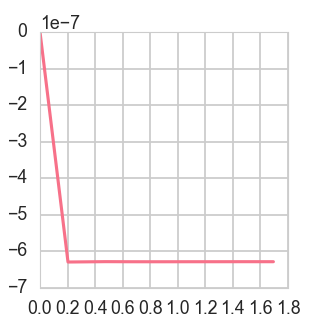

turned off
       time       current
0  0.000000  0.000000e+00
1  0.203147 -6.289560e-07
2  0.475302 -6.279500e-07
3  0.663665 -6.281930e-07
4  0.857540 -6.282390e-07
5  1.073659 -6.281610e-07
6  1.273110 -6.281340e-07
7  1.474521 -6.280440e-07
8  1.693907 -6.280910e-07


In [98]:
%load_ext autoreload
%autoreload 2
%matplotlib nbagg
reload(gpib)
#ke = gpib.KE2602()
df = ke.mes_tpc()

In [97]:
print df

        time       current
0   0.000000  0.000000e+00
1   0.249357 -6.497340e-07
2   0.449106 -6.290330e-07
3   0.652585 -6.292390e-07
4   0.848556 -6.291640e-07
5   1.060870 -6.291270e-07
6   1.260680 -6.291220e-07
7   1.471843 -6.290030e-07
8   1.694655 -6.290080e-07
9   1.910673 -6.290070e-07
10  2.098617 -6.290430e-07
11  2.296887 -6.290300e-07
12  2.500484 -6.289300e-07


In [74]:
import pandas as pd
df = pd.DataFrame([[0, 0]], columns=['A', 'B'])
for i in range(10):
    df_new = pd.DataFrame([[i, i]], columns=['A', 'B'])
    df = df.append(df_new, ignore_index=True)
print df

    A  B
0   0  0
1   0  0
2   1  1
3   2  2
4   3  3
5   4  4
6   5  5
7   6  6
8   7  7
9   8  8
10  9  9


In [73]:
df2 = pd.DataFrame([[1, 1]], columns=['A', 'B'])
df.append(df2)
print df

   A  B
0  0  0
